<a href="https://colab.research.google.com/github/Antonyraj007/Antony-/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np



In [ ]:
# Load and read the dataset
df = pd.read_csv('e_commerce.csv', dtype={'CustomerID': str,'InvoiceID': str})
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (541909, 8)


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
df['sales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [ ]:
pd.pivot_table(df, index='CustomerID', values= 'sales', aggfunc = 'sum')

,sales
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,176.60


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
sales          float64
dtype: object

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
sales               0
dtype: int64

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
col_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename
                           (index={0:'null values (%)'}))

<ipython-input-147-738b69ce1656>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename


In [ ]:
display(col_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
column type,object,object,object,int64,datetime64[ns],float64,object,object,float64
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0,0.0


while looking no of null values 25% of data not assigned any particular customer in this case we can't impute by mean ,mode that is make useless data .so we need to drop the data is only opion for us


In [ ]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (406829, 9)


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
sales          0
dtype: int64

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
sales                 float64
dtype: object

In [ ]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
df['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 406829, dtype: object

In [ ]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:


df = df[df['Country'] != 'Unspecified']

In [ ]:
df["Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil  

In [ ]:
#to check duplicates and drop the duplicate


In [ ]:
df['Country'].duplicated().value_counts()

True     406549
False        36
Name: Country, dtype: int64

In [ ]:
df['InvoiceNo'].duplicated().value_counts()

True     384403
False     22182
Name: InvoiceNo, dtype: int64

In [ ]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicate Entries: 5222


In [ ]:
print("Shape of the data set after droping duplicate entries :", format(df.shape))

Shape of the data set after droping duplicate entries : (401363, 9)


In [ ]:
df['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C546870      1
558333       1
C546868      1
C568581      1
564728       1
Name: InvoiceNo, Length: 22182, dtype: int64

In [ ]:
df.Description.str.contains("LANTERN")

0         False
1          True
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Length: 401363, dtype: bool

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#rename the columns :
def rename_cols(dataframe):
  cols = [var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [ ]:
df = rename_cols(df)

In [ ]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#group by the customerid,invoiceno,country
temp_group = df[['customerid', 'invoiceno', 'country']].groupby(['customerid', 'invoiceno', 'country']).count()



In [ ]:
temp_group

Empty DataFrame
Columns: []
Index: [(12346, 541431, United Kingdom), (12346, C541433, United Kingdom), (12347, 537626, Iceland), (12347, 542237, Iceland), (12347, 549222, Iceland), (12347, 556201, Iceland), (12347, 562032, Iceland), (12347, 573511, Iceland), (12347, 581180, Iceland), (12348, 539318, Finland), (12348, 541998, Finland), (12348, 548955, Finland), (12348, 568172, Finland), (12349, 577609, Italy), (12350, 543037, Norway), (12352, 544156, Norway), (12352, 545323, Norway), (12352, 545332, Norway), (12352, 546869, Norway), (12352, 547390, Norway), (12352, 567505, Norway), (12352, 568699, Norway), (12352, 574275, Norway), (12352, C545329, Norway), (12352, C545330, Norway), (12352, C547388, Norway), (12353, 553900, Bahrain), (12354, 550911, Spain), (12355, 552449, Bahrain), (12356, 541430, Portugal), (12356, 549435, Portugal), (12356, 576895, Portugal), (12357, 574740, Switzerland), (12358, 559707, Austria), (12358, 581232, Austria), (12359, 540946, Cyprus), (12359, 543370, Cyprus), (12359, 555477, Cyprus), (12359, 571034, Cyprus), (12359, C549955, Cyprus), (12359, C580165, Cyprus), (12360, 554132, Austria), (12360, 563749, Austria), (12360, 571705, Austria), (12361, 545017, Belgium), (12362, 544203, Belgium), (12362, 551346, Belgium), (12362, 559295, Belgium), (12362, 563037, Belgium), (12362, 568651, Belgium), (12362, 570667, Belgium), (12362, 572887, Belgium), (12362, 573173, Belgium), (12362, 574329, Belgium), (12362, 580979, Belgium), (12362, C544902, Belgium), (12362, C563752, Belgium), (12362, C579178, Belgium), (12364, 563854, Belgium), (12364, 567897, Belgium), (12364, 573401, Belgium), (12364, 580152, Belgium), (12365, 544574, Cyprus), (12365, 544578, Cyprus), (12365, C544577, Cyprus), (12367, 580716, Denmark), (12370, 538826, Cyprus), (12370, 539330, Austria), (12370, 546236, Cyprus), (12370, 571905, Cyprus), (12371, 570521, Switzerland), (12371, 572770, Switzerland), (12372, 544157, Denmark), (12372, 552731, Denmark), (12372, 568872, Denmark), (12373, 542887, Austria), (12374, 576345, Austria), (12375, 565333, Finland), (12375, 579281, Finland), (12375, C581071, Finland), (12377, 539488, Switzerland), (12377, 542586, Switzerland), (12378, 562046, Switzerland), (12379, 557789, Belgium), (12379, 567196, Belgium), (12379, C559193, Belgium), (12380, 555739, Belgium), (12380, 567928, Belgium), (12380, 571187, Belgium), (12380, 577180, Belgium), (12380, C572532, Belgium), (12381, 563100, Norway), (12381, 570681, Norway), (12381, 570725, Norway), (12381, 574694, Norway), (12381, 580638, Norway), (12381, C565050, Norway), (12383, 539840, Belgium), (12383, 540971, Belgium), (12383, 546434, Belgium), ...]

[22182 rows x 0 columns]

In [ ]:
#adding index
temp_group = temp_group.reset_index(drop = False)


In [ ]:
temp_group

,customerid,invoiceno,country
0,12346,541431,United Kingdom
1,12346,C541433,United Kingdom
2,12347,537626,Iceland
3,12347,542237,Iceland
4,12347,549222,Iceland
...,...,...,...
22177,18283,579673,United Kingdom
22178,18283,580872,United Kingdom
22179,18287,554065,United Kingdom
22180,18287,570715,United Kingdom


In [ ]:
countries = temp_group['country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 36


In [ ]:
countries



United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
USA                         7
Iceland                     7
Israel                      6
Greece                      6
Canada                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Bahrain                     2
Lebanon   

In [ ]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
len(df['customerid'].value_counts())

4368

we find the no of products,transcations,customer


In [ ]:
pd.DataFrame([{'products': len(df['stockcode'].value_counts()),
               'transactions': len(df['invoiceno'].value_counts()),
               'customers': len(df['customerid'].value_counts()),}],
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22182,4368


The Dataframe above shows that the data concern 4372 users and that they bought 3684 different products.

The total number of transactions carried out is of the order of ∼ 22190.



In [ ]:
temp_grp = df.groupby(by=['customerid', 'invoiceno'], as_index=False)['invoicedate'].count()

# Rename the InvoiceDate to number of products
nb_products_per_basket = temp_grp.rename(columns = {'invoicedate':'number of products'})

# Sort in Ascending order based on CustomerID
nb_products_per_basket[:10].sort_values('customerid') # List first 10 values

,customerid,invoiceno,number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [ ]:
display(df.sort_values('customerid')[:5])

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347,Iceland,24.96
220573,556201,23162,REGENCY TEA STRAINER,8,2011-06-09 13:01:00,3.75,12347,Iceland,30.00
220574,556201,23171,REGENCY TEA PLATE GREEN,12,2011-06-09 13:01:00,1.65,12347,Iceland,19.80


At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database). Below, I make a census of the cancel orders and check for the existence of counterparts:

In [ ]:
df_cleaned = df.copy(deep = True)  # made a deep copy of our dataset
df_cleaned['QuantityCanceled'] = 0      # initialize the new varaible in the dataframe

#
entry_to_remove = [] ; doubtfull_entry = []


for index, col in  df.iterrows():
    if (col['quantity'] > 0) or col['description'] == 'Discount': continue
    df_test = df[(df['customerid'] == col['customerid']) &
                         (df['stockcode']  == col['stockcode']) &
                         (df['invoicedate'] < col['invoicedate']) &
                         (df['quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)

    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'quantitycanceled'] = -col['quantity']
        entry_to_remove.append(index)

    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)
        for ind, val in df_test.iterrows():
            if val['quantity'] < -col['quantity']: continue
            df_cleaned.loc[ind, 'quantityCanceled'] = -col['quantity']
            entry_to_remove.append(index)
            break

In [ ]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 7521
doubtfull_entry: 1226


In [ ]:
# Drop the `entry_to_remove` and `doubtfull_entry` accross the row axis
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

In [ ]:
remaining_entries = df_cleaned[(df_cleaned['quantity'] < 0) & (df_cleaned['stockcode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries.head(5)

nb of entries to delete: 48


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,-61.10,0,NaN,NaN
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,-19.80,0,NaN,NaN
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,-8.25,0,NaN,NaN
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,-24.50,0,NaN,NaN
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,-32.34,0,NaN,NaN


In [ ]:
#basket price
df_cleaned['totalprice'] = df_cleaned['unitprice'] * (df_cleaned['quantity'] - df_cleaned['quantitycanceled'])
df_cleaned.sort_values('customerid')[:5]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled,totalprice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,0,74215.0,NaN,0.0
428979,573511,23506,MINI PLAYING CARDS SPACEBOY,20,2011-10-31 12:25:00,0.42,12347,Iceland,8.4,0,NaN,NaN,NaN
428978,573511,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-10-31 12:25:00,0.42,12347,Iceland,8.4,0,NaN,NaN,NaN
428977,573511,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-10-31 12:25:00,1.25,12347,Iceland,15.0,0,NaN,NaN,NaN
428976,573511,23177,TREASURE ISLAND BOOK BOX,8,2011-10-31 12:25:00,2.25,12347,Iceland,18.0,0,NaN,NaN,NaN


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392616 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoiceno         392616 non-null  object        
 1   stockcode         392616 non-null  object        
 2   description       392616 non-null  object        
 3   quantity          392616 non-null  int64         
 4   invoicedate       392616 non-null  datetime64[ns]
 5   unitprice         392616 non-null  float64       
 6   customerid        392616 non-null  object        
 7   country           392616 non-null  object        
 8   sales             392616 non-null  float64       
 9   QuantityCanceled  392616 non-null  int64         
 10  quantitycanceled  4642 non-null    float64       
 11  quantityCanceled  2576 non-null    float64       
 12  totalprice        4642 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memor

In [ ]:
# sum of purchases / user & order
temp_sum = df_cleaned.groupby(by=['customerid', 'invoiceno'], as_index=False)['totalprice'].sum()
basket_price = temp_sum.rename(columns = {'totalprice':'basket price'})

# date of the order
df_cleaned['invoicedate_int'] = df_cleaned['invoicedate'].astype('int64')
temp_date = df_cleaned.groupby(by=['customerid', 'invoiceno'], as_index=False)['invoicedate_int'].mean()
df_cleaned.drop('invoicedate_int', axis = 1, inplace = True)
basket_price.loc[:, 'invoicedate'] = pd.to_datetime(temp_date['invoicedate_int'])

# selection of significant entries:
basket_price = basket_price[basket_price['basket price'] > 0]
basket_price.sort_values('customerid')[:6]

,customerid,invoiceno,basket price,invoicedate
34,12359,571034,128.80,2011-10-13 12:47:00
39,12362,544203,36.20,2011-02-17 10:30:00
42,12362,563037,20.20,2011-08-11 15:02:00
68,12375,579281,39.52,2011-11-29 10:36:00
72,12379,557789,21.45,2011-06-22 16:32:00
76,12380,571187,21.25,2011-10-14 11:39:00


In [ ]:
basket_price.tail(6)

,customerid,invoiceno,basket price,invoicedate
18571,18260,540539,63.20,2011-01-09 14:42:00
18574,18260,553575,37.35,2011-05-18 10:08:00
18581,18263,576092,39.52,2011-11-14 09:00:00
18589,18272,551507,30.90,2011-04-28 18:11:00
18598,18276,572990,6.25,2011-10-27 10:54:00
18603,18282,562525,12.47,2011-08-05 13:35:00


In [ ]:
basket_price.max()

customerid                    18282
invoiceno                    580719
basket price                 2203.2
invoicedate     2011-12-05 16:54:00
dtype: object

In [ ]:
 basket_price.min()

customerid                    12359
invoiceno                    536374
basket price                   0.29
invoicedate     2010-12-01 09:09:00
dtype: object

In [ ]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df_cleaned

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled,totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,0,NaN,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0,NaN,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN


In [ ]:
df['quantity'].value_counts()

 1        69498
 12       59797
 2        57399
 6        37468
 4        32083
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: quantity, Length: 436, dtype: int64

In [ ]:
 df[df['quantity'] < 0] = 0

In [ ]:
df['quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: quantity, Length: 401363, dtype: int64

In [ ]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid      object
country         object
sales          float64
dtype: object

In [ ]:
df['quantity'].isnull().sum()

0

In [ ]:
df.shape

(401363, 9)

In [ ]:
df_cleaned.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled,totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN


In [ ]:
df_cleaned.drop_duplicates()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled,totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,0,NaN,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0,NaN,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN


In [ ]:
df_cleaned

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,QuantityCanceled,quantitycanceled,quantityCanceled,totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,0,NaN,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0,NaN,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0,NaN,NaN,NaN


In [ ]:
pd.pivot_table(df, index='customerid', values= 'sales', aggfunc = 'sum')

,sales
customerid,
0,0.00
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
...,...
18280,180.60
18281,80.82
18282,178.05


In [ ]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
pd.pivot_table(df, index='customerid', values= 'quantity', aggfunc = 'sum')

,quantity
customerid,
0,0
12346,74215
12347,2458
12348,2341
12349,631
...,...
18280,45
18281,54
18282,103


In [ ]:
df['stockcode'].value_counts()

0         8872
85123A    2023
22423     1712
85099B    1615
84879     1392
          ... 
77079        1
90026A       1
90001A       1
90190B       1
23843        1
Name: stockcode, Length: 3666, dtype: int64

In [ ]:
list_special_codes = df_cleaned[df_cleaned['stockcode'].str.contains('^[a-zA-Z]+', regex=True)]['stockcode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [ ]:
# Pick this uniques characters from Description that corresponds to the special codes
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['stockcode'] == code]['description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [ ]:
df_products = pd.DataFrame(df_cleaned['description'].unique()).rename(columns = {0:'description'})

In [ ]:
df_products

,description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3873,"LETTER ""W"" BLING KEY RING"
3874,"LETTER ""Z"" BLING KEY RING"
3875,PINK CRYSTAL SKULL PHONE CHARM
3876,CREAM HANGING HEART T-LIGHT HOLDER


In [ ]:
concatenated_descriptions = df_cleaned.groupby('customerid')['description'].apply(lambda x: ' '.join(x)).reset_index()


In [ ]:
df_prod=concatenated_descriptions

In [ ]:
#now we apply nlp to descrption column and convert to numerical value


In [ ]:
#clean and compress the data
#remove punctuations
#replace the short words(len less than 2 )
#changing lower case to upper case
#stop word removing
#lemmitazation


df_prod['description']=df_prod['description'].str.replace('[^A-Za-z0-9]',' ')


<ipython-input-211-2ee400eb17ce>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_prod['description']=df_prod['description'].str.replace('[^A-Za-z0-9]',' ')


In [ ]:
df_prod['description']

0                          MEDIUM CERAMIC TOP STORAGE JAR
1       BLACK CANDELABRA T LIGHT HOLDER AIRLINE BAG VI...
2       72 SWEETHEART FAIRY CAKE CASES 60 CAKE CASES D...
3       PARISIENNE CURIO CABINET SWEETHEART WALL TIDY ...
4       CHOCOLATE THIS WAY METAL SIGN METAL SIGN NEIGH...
                              ...                        
4330    WOOD BLACK BOARD ANT WHITE FINISH RETROSPOT LA...
4331    ROBOT BIRTHDAY CARD CARD CIRCUS PARADE PENNY F...
4332    ANTIQUE CREAM CUTLERY CUPBOARD FRENCH STYLE ST...
4333    CHARLOTTE BAG PINK POLKADOT LUNCH BAG WOODLAND...
4334    SMALL PURPLE BABUSHKA NOTEBOOK  SMALL RED BABU...
Name: description, Length: 4335, dtype: object

In [ ]:
df_prod['description']=df_prod['description'].apply(lambda row:  ' '.join([word for  word in row.split() if len(word)>2]))

In [ ]:
df_prod

,customerid,description
0,12346,MEDIUM CERAMIC TOP STORAGE JAR
1,12347,BLACK CANDELABRA LIGHT HOLDER AIRLINE BAG VINT...
2,12348,SWEETHEART FAIRY CAKE CASES CAKE CASES DOLLY G...
3,12349,PARISIENNE CURIO CABINET SWEETHEART WALL TIDY ...
4,12350,CHOCOLATE THIS WAY METAL SIGN METAL SIGN NEIGH...
...,...,...
4330,18280,WOOD BLACK BOARD ANT WHITE FINISH RETROSPOT LA...
4331,18281,ROBOT BIRTHDAY CARD CARD CIRCUS PARADE PENNY F...
4332,18282,ANTIQUE CREAM CUTLERY CUPBOARD FRENCH STYLE ST...
4333,18283,CHARLOTTE BAG PINK POLKADOT LUNCH BAG WOODLAND...


In [ ]:
df_prod['description']=[row.lower() for row in df_prod['description']]


In [ ]:
df_prod

,customerid,description
0,12346,medium ceramic top storage jar
1,12347,black candelabra light holder airline bag vint...
2,12348,sweetheart fairy cake cases cake cases dolly g...
3,12349,parisienne curio cabinet sweetheart wall tidy ...
4,12350,chocolate this way metal sign metal sign neigh...
...,...,...
4330,18280,wood black board ant white finish retrospot la...
4331,18281,robot birthday card card circus parade penny f...
4332,18282,antique cream cutlery cupboard french style st...
4333,18283,charlotte bag pink polkadot lunch bag woodland...


In [ ]:
#stop word removal
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words=stopwords.words('english')
stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stop_words])
  return rev_new

df_prod['description']=[remove_stopwords(r) for r in df_prod['description']]

In [ ]:
df_prod

,customerid,description
0,12346,medium ceramic top storage jar
1,12347,black candelabra light holder airline bag vint...
2,12348,sweetheart fairy cake cases cake cases dolly g...
3,12349,parisienne curio cabinet sweetheart wall tidy ...
4,12350,chocolate way metal sign metal sign neighbourh...
...,...,...
4330,18280,wood black board ant white finish retrospot la...
4331,18281,robot birthday card card circus parade penny f...
4332,18282,antique cream cutlery cupboard french style st...
4333,18283,charlotte bag pink polkadot lunch bag woodland...


In [ ]:
#lemitazation
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None







In [ ]:
def lemmatize_sentence(sentence):

   nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
   wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
   lemmatized_sentence=[]
   for word,tag in wordnet_tagged:
       if tag is None:
         lemmatized_sentence.append(word)
       else:
          lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
   return " ".join(lemmatized_sentence)

df_prod['description']=df_prod['description'].apply(lambda x:lemmatize_sentence(x))



In [ ]:
df_prod

,customerid,description
0,12346,medium ceramic top storage jar
1,12347,black candelabra light holder airline bag vint...
2,12348,sweetheart fairy cake case cake case dolly gir...
3,12349,parisienne curio cabinet sweetheart wall tidy ...
4,12350,chocolate way metal sign metal sign neighbourh...
...,...,...
4330,18280,wood black board ant white finish retrospot la...
4331,18281,robot birthday card card circus parade penny f...
4332,18282,antique cream cutlery cupboard french style st...
4333,18283,charlotte bag pink polkadot lunch bag woodland...


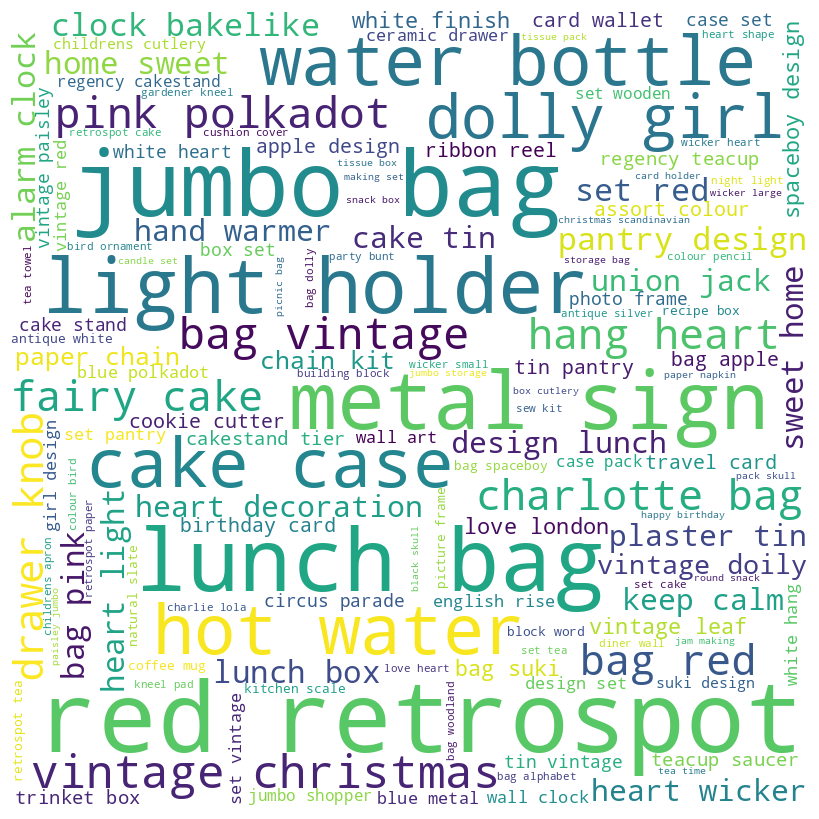

In [ ]:
from wordcloud import WordCloud
word_cloud_df=df_prod

all_words=" ".join([text for text in word_cloud_df['description']])

wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(all_words)


plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


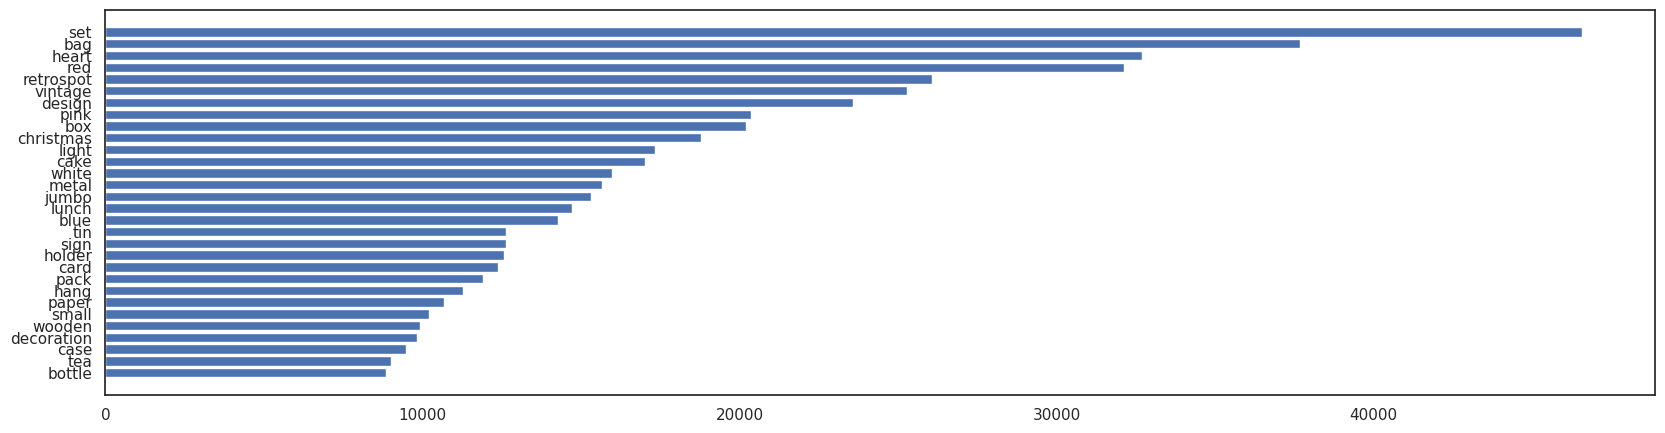

In [ ]:
#plotting the most frequent words from nic name
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from nltk import FreqDist


word_cloud_df=df_prod

all_words=" ".join([text for text in word_cloud_df['description']])

all_words=all_words.split()

words_df=FreqDist(all_words)

words_df=pd.DataFrame({'word':list(words_df.keys()),'count':list(words_df.values())})

words_df

words_df=words_df.nlargest(columns='count',n=30)

words_df.sort_values('count',inplace=True)

plt.figure(figsize=(20,5))
ax=plt.barh(words_df['word'],width=words_df['count'])
plt.show()




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer()
df_prod['description']=tfidf.fit_transform(df_prod['description']).toarray()

fature_Names=tfidf.get_feature_names_out()


df_prod['description']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4330    0.0
4331    0.0
4332    0.0
4333    0.0
4334    0.0
Name: description, Length: 4335, dtype: float64

In [ ]:
df_prod

,customerid,description
0,12346,0.0
1,12347,0.0
2,12348,0.0
3,12349,0.0
4,12350,0.0
...,...,...
4330,18280,0.0
4331,18281,0.0
4332,18282,0.0
4333,18283,0.0


In [ ]:
df_sales=pd.pivot_table(df_cleaned, index='customerid', values= 'sales', aggfunc = 'sum')

In [ ]:
df_country = pd.DataFrame(df_cleaned['country'].unique()).rename(columns = {0:'country'})

In [ ]:
df_country = df_cleaned[['customerid', 'country']].drop_duplicates()


In [ ]:
df_country

,customerid,country
0,17850,United Kingdom
9,13047,United Kingdom
26,12583,France
46,13748,United Kingdom
65,15100,United Kingdom
...,...,...
536969,13436,United Kingdom
537255,15520,United Kingdom
538064,13298,United Kingdom
538812,14569,United Kingdom


In [ ]:
df_sales

,sales
customerid,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [ ]:
df_sales['sales'].value_counts()

76.32      4
35.40      3
15.00      3
440.00     3
363.65     3
          ..
1530.75    1
605.06     1
183.85     1
311.65     1
1837.28    1
Name: sales, Length: 4253, dtype: int64

In [ ]:
df_prod

,customerid,description
0,12346,0.0
1,12347,0.0
2,12348,0.0
3,12349,0.0
4,12350,0.0
...,...,...
4330,18280,0.0
4331,18281,0.0
4332,18282,0.0
4333,18283,0.0


In [ ]:
df_1= df_prod.merge(df_sales, on='customerid', how='inner')


In [ ]:
df_2 = df_1.merge(df_country, on='customerid', how='inner')


In [ ]:
df_2

,customerid,description,sales,country
0,12346,0.0,77183.60,United Kingdom
1,12347,0.0,4310.00,Iceland
2,12348,0.0,1797.24,Finland
3,12349,0.0,1757.55,Italy
4,12350,0.0,334.40,Norway
...,...,...,...,...
4338,18280,0.0,180.60,United Kingdom
4339,18281,0.0,80.82,United Kingdom
4340,18282,0.0,178.05,United Kingdom
4341,18283,0.0,2045.53,United Kingdom


In [ ]:
df_2['country'].value_counts()

United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Netherlands                9
Denmark                    9
Australia                  9
Japan                      8
Sweden                     8
Cyprus                     8
Poland                     6
Canada                     4
Greece                     4
USA                        4
EIRE                       3
Israel                     3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
RSA                        1
Iceland                    1
Lebanon                    1
Brazil                     1
Czech Republic             1
European Commu

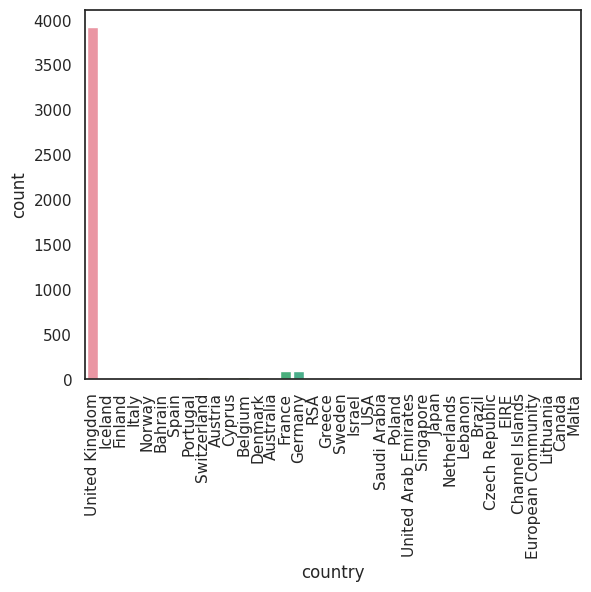

In [ ]:
sns.countplot(x=df_2['country'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
df_3 = encoder.fit_transform(df_country).toarray()
print(df_3)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
df_2

,customerid,description,sales,country
0,12346,0.0,77183.60,United Kingdom
1,12347,0.0,4310.00,Iceland
2,12348,0.0,1797.24,Finland
3,12349,0.0,1757.55,Italy
4,12350,0.0,334.40,Norway
...,...,...,...,...
4338,18280,0.0,180.60,United Kingdom
4339,18281,0.0,80.82,United Kingdom
4340,18282,0.0,178.05,United Kingdom
4341,18283,0.0,2045.53,United Kingdom


In [ ]:
one_hot_encoded = pd.get_dummies(df_2['country'])
df_2_encoded=df_2.join(one_hot_encoded)

In [ ]:
df_2_encoded

,customerid,description,sales,country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,12346,0.0,77183.60,United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12347,0.0,4310.00,Iceland,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0.0,1797.24,Finland,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0.0,1757.55,Italy,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0.0,334.40,Norway,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,18280,0.0,180.60,United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4339,18281,0.0,80.82,United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4340,18282,0.0,178.05,United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4341,18283,0.0,2045.53,United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df_2_encoded.drop('country',axis=1)

In [ ]:
X

,customerid,description,sales,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,12346,0.0,77183.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12347,0.0,4310.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0.0,1797.24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0.0,1757.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0.0,334.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,18280,0.0,180.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4339,18281,0.0,80.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4340,18282,0.0,178.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4341,18283,0.0,2045.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X

,customerid,description,sales,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,12346,0.0,77183.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12347,0.0,4310.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0.0,1797.24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0.0,1757.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0.0,334.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,18280,0.0,180.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4339,18281,0.0,80.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4340,18282,0.0,178.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4341,18283,0.0,2045.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

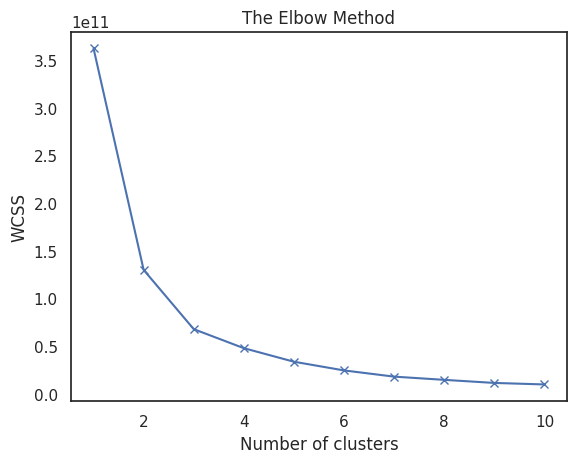

In [ ]:
#using elbow method to determine number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#fitting k-means
kmeans = KMeans(n_clusters =3,init = 'k-means++',random_state = 8)
y= kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_

array([[ 1.52967698e+04,  5.35591842e-04,  1.43511093e+03,
         1.85830430e-03,  2.55516841e-03,  4.64576074e-04,
         5.80720093e-03,  2.32288037e-04,  9.29152149e-04,
         2.09059233e-03,  1.85830430e-03,  2.32288037e-04,
         2.09059233e-03,  2.32288037e-04,  2.32288037e-04,
         2.78745645e-03,  2.02090592e-02,  2.18350755e-02,
         9.29152149e-04,  2.32288037e-04,  6.96864111e-04,
         3.25203252e-03,  1.85830430e-03,  2.32288037e-04,
         2.32288037e-04,  4.64576074e-04,  1.85830430e-03,
         2.32288037e-03,  1.39372822e-03,  4.41347271e-03,
         2.32288037e-04,  2.32288037e-04,  2.32288037e-04,
         6.96864111e-03,  1.62601626e-03,  4.87804878e-03,
         9.29152149e-04,  4.64576074e-04,  9.03135889e-01],
       [ 1.56616667e+04,  0.00000000e+00,  1.95104433e+05,
         1.66666667e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [ ]:
print(y)

[2 0 0 ... 0 0 0]


In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4343 out of 4343 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 1.00


In [ ]:
labels=kmeans.labels_

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
#Importing required modules

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Load Data
data = load_digits().data
pca = PCA(2)

#Transform the data
df= pca.fit_transform(X)

df.shape

(4343, 2)

In [ ]:
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters=3)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[2 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


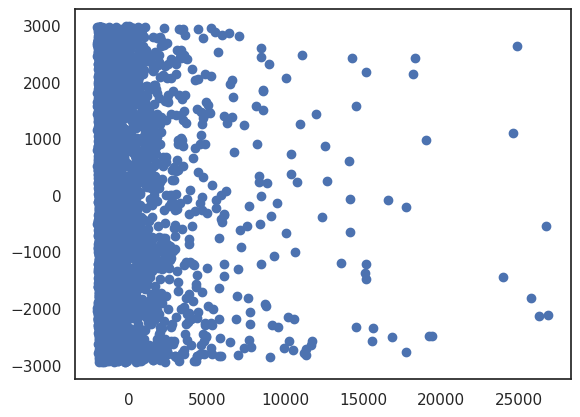

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

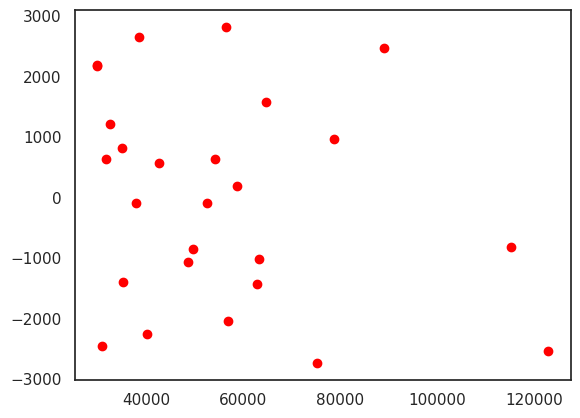

In [ ]:
#filter rows of original data
filtered_label2 = df[label == 2]

filtered_label8 = df[label == 8]

#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

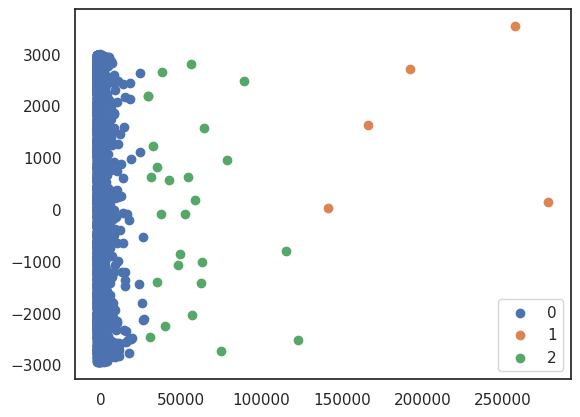

In [ ]:
#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

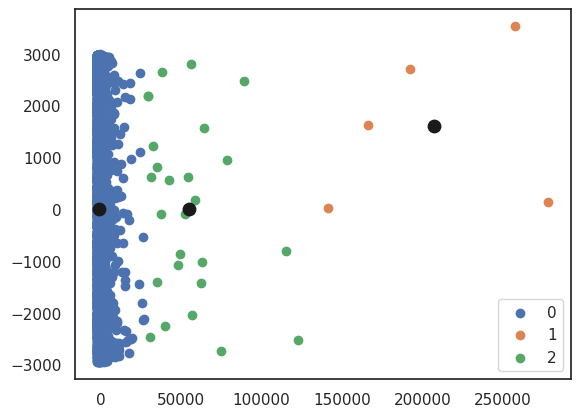

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
km=KMeans(n_clusters=3)
y_predcited=km.fit_predict(X)
y=y_predcited

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km.n_iter_

3

In [ ]:
km.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

km=KMeans(n_clusters=3,random_state=0)
km.fit(X)
print(silhouette_score(X,km.labels_))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9324537663579191


In [ ]:
result =X.copy()
result['cluster'] = km.predict(X)

In [ ]:
result

,customerid,description,sales,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,cluster
0,12346,0.0,77183.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,12347,0.0,4310.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0.0,1797.24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0.0,1757.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0.0,334.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,18280,0.0,180.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4339,18281,0.0,80.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4340,18282,0.0,178.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4341,18283,0.0,2045.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

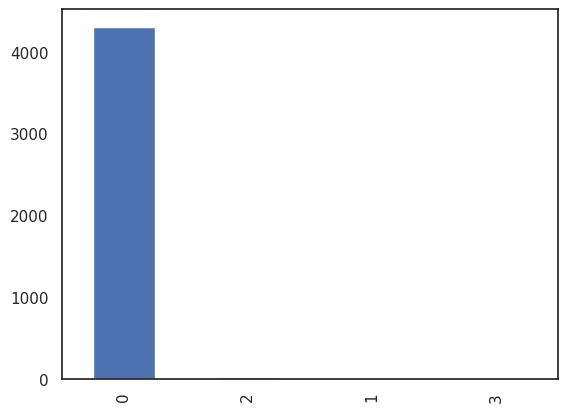

In [ ]:
result.cluster.value_counts().plot.bar()

In [ ]:
data = df_2.join(result['cluster'])


In [ ]:
data

,customerid,description,sales,country,cluster
0,12346,0.0,77183.60,United Kingdom,2
1,12347,0.0,4310.00,Iceland,0
2,12348,0.0,1797.24,Finland,0
3,12349,0.0,1757.55,Italy,0
4,12350,0.0,334.40,Norway,0
...,...,...,...,...,...
4338,18280,0.0,180.60,United Kingdom,0
4339,18281,0.0,80.82,United Kingdom,0
4340,18282,0.0,178.05,United Kingdom,0
4341,18283,0.0,2045.53,United Kingdom,0


In [ ]:
data.sort_values('cluster')

,customerid,description,sales,country,cluster
2171,15296,0.0,3672.86,United Kingdom,0
2880,16258,0.0,5203.51,United Kingdom,0
2881,16260,0.0,1035.45,United Kingdom,0
2882,16261,0.0,728.54,United Kingdom,0
2883,16265,0.0,5447.00,United Kingdom,0
...,...,...,...,...,...
4026,17857,0.0,26879.04,United Kingdom,2
2995,16422,0.0,34546.84,United Kingdom,2
1989,15061,0.0,54534.14,United Kingdom,2
3181,16684,0.0,66625.52,United Kingdom,2


In [ ]:
average_sales_by_cluster = data.groupby('cluster')['sales'].mean()


In [ ]:
data['cluster'].value_counts()

0    4306
2      32
1       5
Name: cluster, dtype: int64

In [ ]:
average_sales_by_cluster

cluster
0      1440.810435
1    209142.414000
2     51612.375313
Name: sales, dtype: float64

In [ ]:
customer_count_by_country = data.groupby(['cluster', 'country'])['customerid'].count()


In [ ]:
customer_count_by_country

cluster  country             
0        Australia                  8
         Austria                   11
         Bahrain                    2
         Belgium                   25
         Brazil                     1
         Canada                     4
         Channel Islands            9
         Cyprus                     8
         Czech Republic             1
         Denmark                    9
         EIRE                       1
         European Community         1
         Finland                   12
         France                    87
         Germany                   94
         Greece                     4
         Iceland                    1
         Israel                     3
         Italy                     14
         Japan                      8
         Lebanon                    1
         Lithuania                  1
         Malta                      2
         Netherlands                8
         Norway                    10
         Poland     

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np


Text(0.5, 1.0, 'Country Distribution within Clusters')

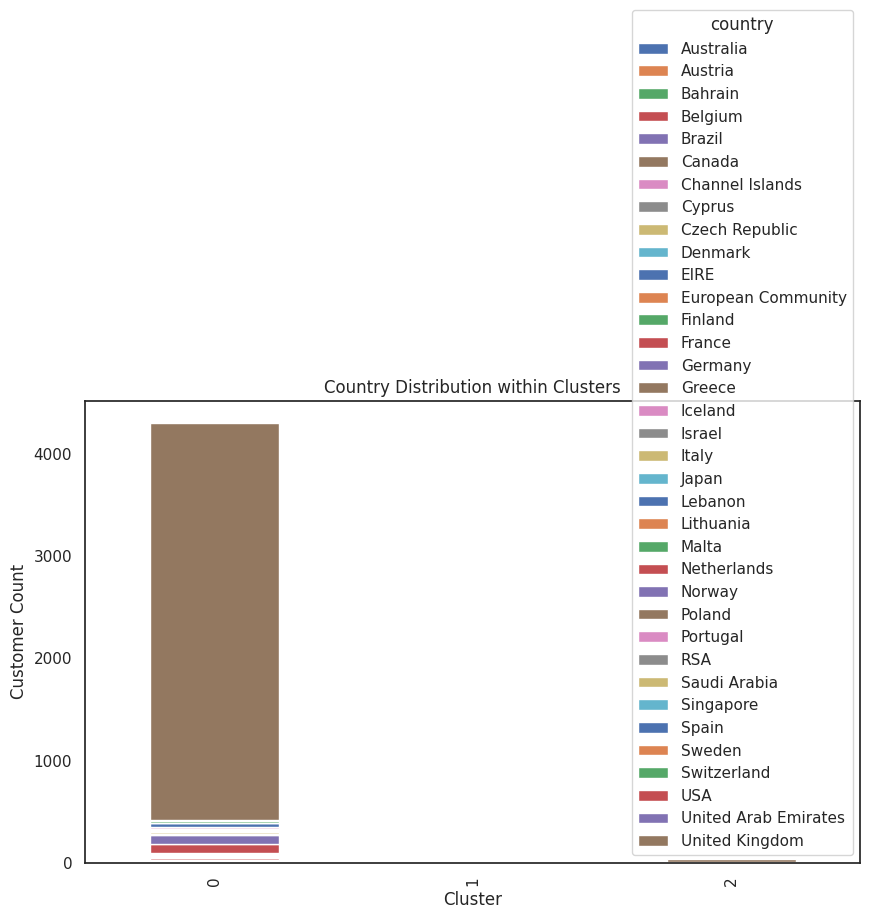

In [ ]:
customer_count_by_country = data.groupby(['cluster', 'country']).size().unstack()
customer_count_by_country.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.title('Country Distribution within Clusters')

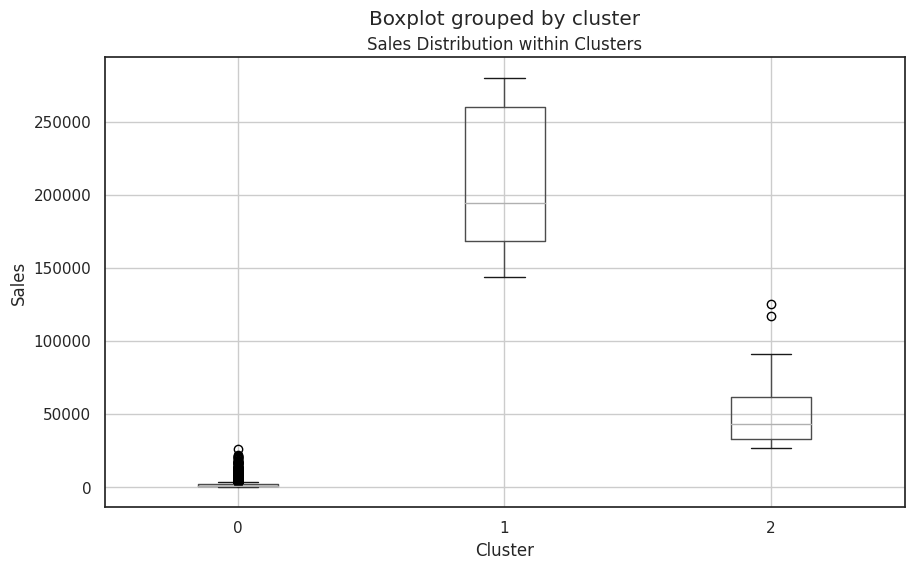

In [ ]:
data.boxplot(column='sales', by='cluster', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.title('Sales Distribution within Clusters')

# Display the plot
plt.show()

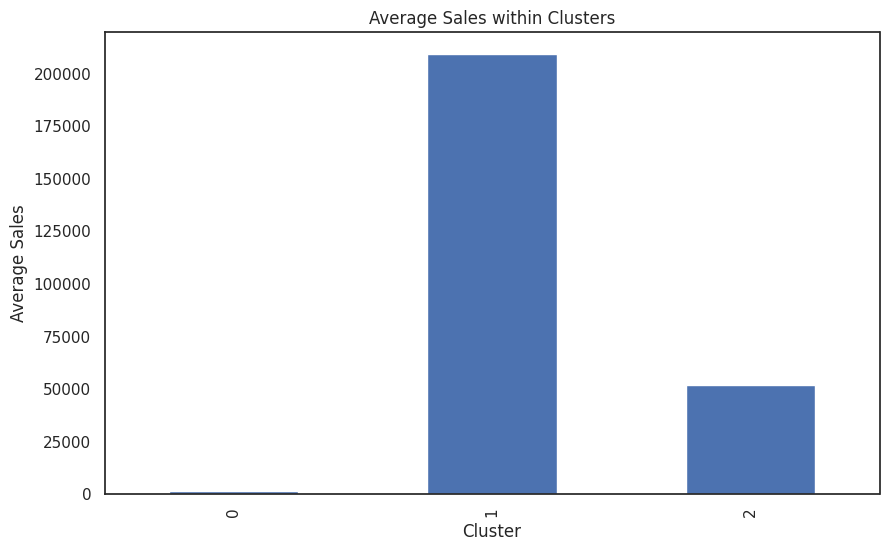

In [ ]:
average_sales_by_cluster = data.groupby('cluster')['sales'].mean()

average_sales_by_cluster.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Average Sales')
plt.title('Average Sales within Clusters')

plt.show()






